### Testes com Minimal Spanning Tree based Clustering nos dados das espirais

18 nov 2017

In [1]:
# carregando libs necessárias
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, interpolate
%matplotlib inline
#%matplotlib notebook 
# figuras maiores

In [2]:
def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2, s=3)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);


In [3]:
# lendo o dataset
esp = pd.read_csv('espiral.csv')

In [4]:
esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 3 columns):
x    1872 non-null float64
y    1872 non-null float64
z    1872 non-null float64
dtypes: float64(3)
memory usage: 44.0 KB


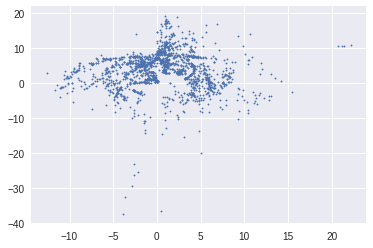

In [5]:
plt.scatter(esp.iloc[:,0], esp.iloc[:,1], s=2)

In [6]:
esp2 = esp.iloc[:,0:2]
esp2

,x,y
0,0.00,6.80
1,0.00,6.80
2,0.04,0.21
3,0.01,6.80
4,0.05,0.30
5,0.06,0.25
6,0.07,0.56
7,0.08,0.45
8,0.07,0.77
9,0.08,0.57


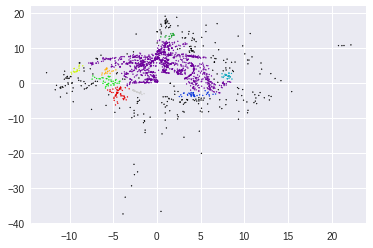

In [7]:
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=.55, min_cluster_size=13)
labels = model.fit_predict(esp2)
plt.scatter(esp.iloc[:, 0], esp.iloc[:, 1], c=labels, cmap='nipy_spectral', s=1);

In [8]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

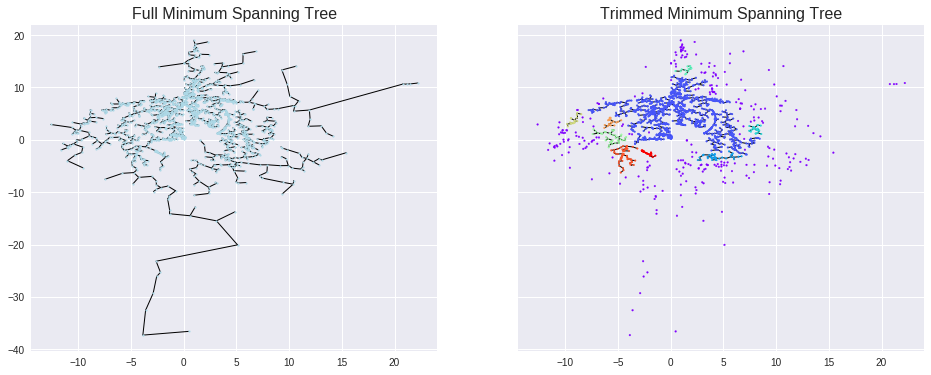

In [9]:
plot_mst(model)
#plt.savefig('espirais_MST_cutoff_0.1.png', bbox_inches='tight')

### A de baixo até parecia promissora, mas fez praticamente um cluster para cada ponto
- o fato de usar cores muito próximas para todos esses pontos engana!

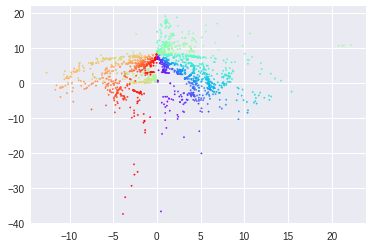

In [10]:
from mst_clustering import MSTClustering
model2 = MSTClustering(cutoff_scale=0.00001, approximate=False)
labels2 = model2.fit_predict(esp)
plt.scatter(esp.iloc[:, 0], esp.iloc[:, 1], c=labels2, cmap='rainbow', s=2);

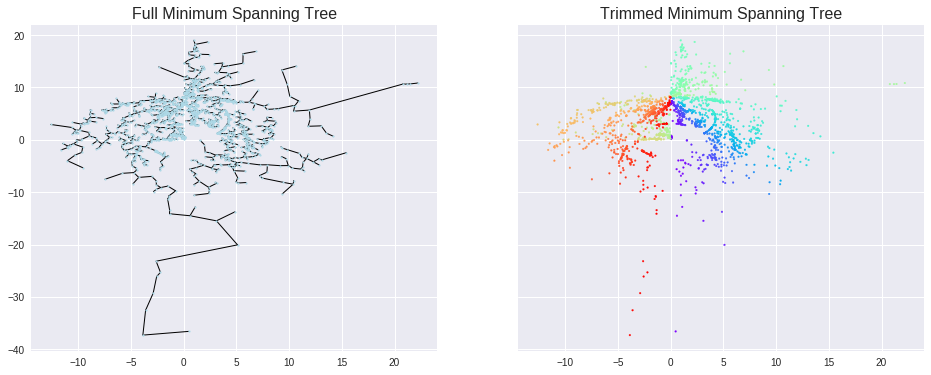

In [11]:
plot_mst(model2)
#plt.savefig('espirais_MST_cutoff_0.1.png', bbox_inches='tight')

In [12]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)

#X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(esp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

n_clusters_

Automatically created module for IPython interactive environment


30

In [13]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

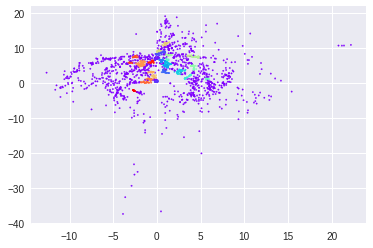

In [14]:
plt.scatter(esp.iloc[:, 0], esp.iloc[:, 1], c=labels, cmap='rainbow', s=2);

In [15]:
## GMM com chutes iniciais para as médias (bivariadas)
# define and train GMM
#X2 = sikora_df2.iloc[:,:2]
#est = GaussianMixture(covariance_type='full', n_components=2, means_init=[[43,41], [44,38]]) # jah ficou melhor
model = GaussianMixture(covariance_type='full', n_components=9)
#, means_init=[[42,40.5], [43,37]]) # melhor ainda
#est = GaussianMixture(covariance_type='full', n_components=2, means_init=[[41,40.5], [43,37]]) # esse fica igual aos antigos
#est2

Y_fit2 = model.fit(esp)
Y_fit2

Y_predict2 = pd.DataFrame(model.predict(esp), columns=['cluster_id'])
Y_predict2

result2 = pd.concat([esp, Y_predict2], axis=1)  

result2

,x,y,z,cluster_id
0,0.00,6.80,0.00,0
1,0.00,6.80,-0.01,0
2,0.04,0.21,-0.07,1
3,0.01,6.80,0.00,0
4,0.05,0.30,-0.11,1
5,0.06,0.25,-0.08,1
6,0.07,0.56,-0.09,1
7,0.08,0.45,-0.05,1
8,0.07,0.77,-0.11,1
9,0.08,0.57,-0.08,1


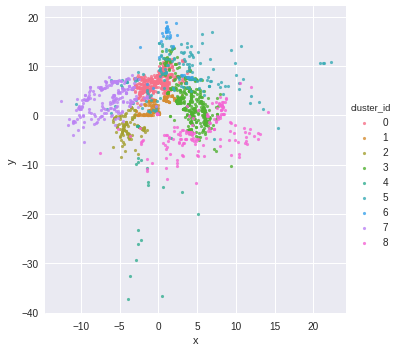

In [17]:
sns.lmplot('x', # Horizontal axis
           'y', # Vertical axis
           data=result2, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='cluster_id', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 10}) # S marker size
plt.show()

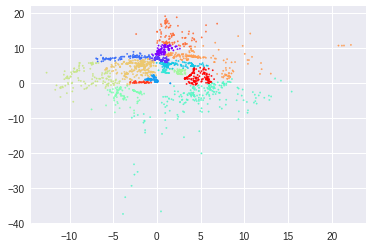

In [74]:
from sklearn.cluster import SpectralClustering
sp = SpectralClustering(n_clusters=15, affinity="nearest_neighbors", eigen_solver="arpack")
labels = sp.fit_predict(esp)
labels
plt.scatter(esp.iloc[:, 0], esp.iloc[:, 1], c=labels, cmap='rainbow', s=2)